# Imports

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Data Frames

In [2]:
# Creating a data frame
df = pd.read_csv('thomascrc_data.txt', delimiter = '\t')
df
# Creating a list of the species in the microbiome
print(df.columns)
print('\n\n')

# Read specific columns
print(df['DiseaseStatus'])
print('\n\n')

# Read a specific row
print(df.iloc[0])

Index(['s__Enterobacter_cloacae', 's__Escherichia_coli',
       's__Bifidobacterium_bifidum', 's__Escherichia_unclassified',
       's__Bifidobacterium_longum', 's__Enterococcus_faecalis',
       's__Lactococcus_phage_936_sensu_lato', 's__Ruminococcus_gnavus',
       's__Bifidobacterium_breve', 's__Lactococcus_phage_P680',
       ...
       's__Aquabirnavirus_unclassified', 's__Prevotella_ruminicola',
       's__Eremococcus_coleocola', 's__Desulfotomaculum_ruminis',
       's__Diplodia_scrobiculata_RNA_virus_1',
       's__Methanobacterium_unclassified', 's__Clostridium_phage_phiCP7R',
       's__Porcine_stool_associated_circular_virus_2',
       's__Staphylococcus_vitulinus', 'DiseaseStatus'],
      dtype='object', length=831)



SID31004          1.0
SID31009          0.0
SID31021          0.0
SID31030          NaN
SID31071          0.0
                 ... 
MMPU29365221ST    0.0
MMPU68403337ST    0.0
MMPU72854103ST    0.0
MMPU84450604ST    0.0
MMPU99077057ST    0.0
Name: DiseaseStat

# Histograms

## For Individual Patients (Species are Unordered)

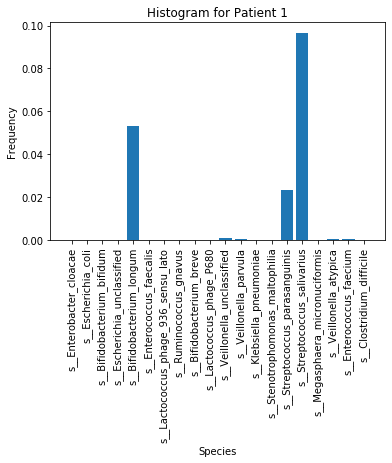

In [3]:
def patient_histogram(patient, num_elements, font_size):
    # The x coordinates of the histogram
    species_names = df.columns[0:num_elements]

    # The y coordinates of the histogram
    species_values = []
    for i in range(num_elements):
        species_values.append(df.iloc[patient][i])
    
    # Creating the histogram
    plt.bar(species_names, species_values)

    # Styling for the histogram
    plt.xlabel('Species')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize = font_size)
    plt.ylabel('Frequency')
    plt.title('Histogram for Patient ' + str(patient + 1))

patient_histogram(0,20,10)

## Counting the Disease Status of All Patients

[312, 352, 149]


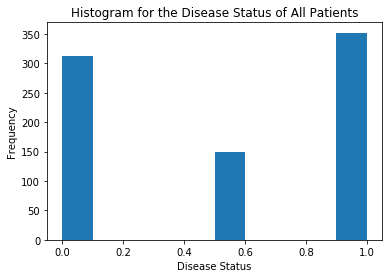

In [9]:
def diseasestatus_histogram():
    NUM_PATIENTS = 813
    # The x coordinates of the histogram
    healthy_values = []
    values_count = [0, 0, 0]
    for i in range(813):
        value = df.iloc[i][830]
        
        # If the patient does not have a disease value, this histogram will identify it as 0.5
        if value != 0.0 and value != 1.0:
            value = 0.5
            values_count[2] += 1
        if value == 0.0:
            values_count[0] += 1
        if value == 1.0:
            values_count[1] += 1
            
        healthy_values.append(value)

    print(values_count)
    # Creating the histogram
    plt.hist(healthy_values)

    # Styling for the histogram
    plt.xlabel('Disease Status')
    plt.xticks(fontsize = 10)
    plt.ylabel('Frequency')
    plt.title('Histogram for the Disease Status of All Patients')

diseasestatus_histogram()

## For Individual Patients (Displays the 20 Most Frequent Species)

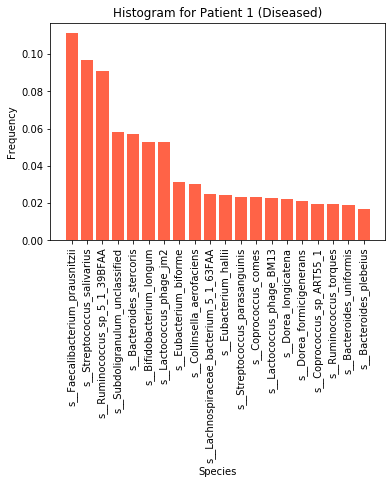

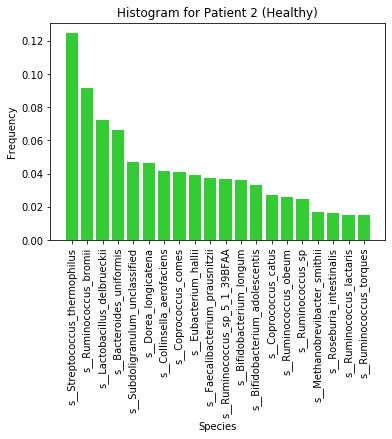

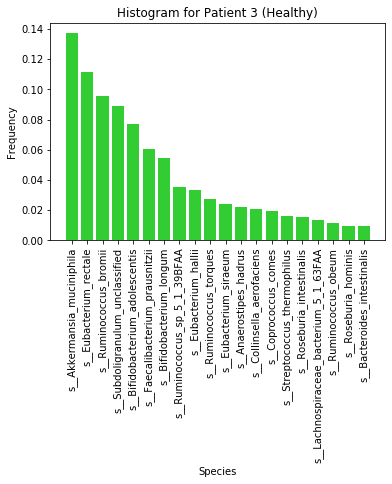

In [5]:
def sorted_patient_histogram(patient, num_elements, font_size):
    TOTAL_NUM_ELEMENTS = 830
    
    # The unsorted x coordinates of the histogram
    species_names = list(df.columns)
    
    # The unsorted y coordinates of the histogram
    species_values = []
    for i in range(TOTAL_NUM_ELEMENTS):
        species_values.append(df.iloc[patient][i])
    
    # Selection sort algorithm for the x and y coordinates
    names_indexes = [];
    for j in range(num_elements):
        max_value_index = j
        for k in range(j + 1, TOTAL_NUM_ELEMENTS):
            if species_values[k] > species_values[max_value_index]:
                max_value_index = k
        species_values[j], species_values[max_value_index] = species_values[max_value_index], species_values[j]
        species_names[j], species_names[max_value_index] = species_names[max_value_index], species_names[j]
        
    # Styling for the histogram
    plt.xlabel('Species')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize = font_size)
    plt.ylabel('Frequency')
    health_status_string = 'Diseased'
    plt_color = 'Tomato'
    if df.iloc[patient][830] == 0.0:
        health_status_string = 'Healthy'
        plt_color = 'Limegreen'
    plt.title('Histogram for Patient ' + str(patient + 1) + ' (' + health_status_string + ')')
    
     # Plotting the histogram
    plt.bar(species_names[0:num_elements], species_values[0:num_elements], color = plt_color)
    plt.show()

sorted_patient_histogram(0,20,10)
sorted_patient_histogram(1,20,10)
sorted_patient_histogram(2,20,10)

# Random Forests

## Removing Patients with Unknown Disease Status from the Data

In [3]:
# Creating test and train datasets
df = df[df.DiseaseStatus >= 0.0]
target = np.array(list(df.DiseaseStatus))
data = df.drop(['DiseaseStatus'], axis = 'columns')

## A Model Without Cross Validation

In [7]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = None)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
# Getting the model's accuracy
model.score(X_test, y_test)

0.7593984962406015

Text(-3.0, 0.5, 'Truth')

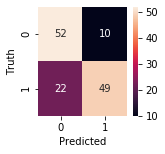

In [9]:
# Creating a confusion matrix to visualize the model's accuracy
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (2, 2))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
# Getting the AUC of this non-cross validated model
model_fpr, model_tpr, threshold = roc_curve(y_test, y_predicted, pos_label = 1)
model_auc = auc(model_fpr, model_tpr)
model_auc

0.7644252612448887

## A Model with 10-Fold Cross Validation

In [4]:
start_time = time.time()
cv_model = RandomForestClassifier(n_estimators = 1000, max_features = 0.3, min_samples_leaf = 5)
scores = cross_val_score(cv_model, data, target, cv = 10, scoring = 'roc_auc')
print(scores.mean())
print("Time elapsed: " + str(time.time() - start_time) + " seconds")

0.7576993727598567
Time elapsed: 101.17595624923706 seconds


## Tuning the 10-Fold Cross Validated Model

In [12]:
start_time = time.time()
tuned_cv_model = RandomForestClassifier(max_features = 0.3, n_jobs = -1)
grid_search_model = GridSearchCV(tuned_cv_model, {
    'n_estimators' : [500, 1000, 2000],
    'max_depth' : [10, 50, 100],
    'min_samples_leaf' : [1, 10, 20, 50],
    'min_samples_split' : [2, 10, 50, 100, 150],
    'criterion' : ['gini', 'entropy']
}, cv = 10, scoring = 'roc_auc', n_jobs = -1)
grid_search_model.fit(data, target)
print("Time elapsed: " + str(time.time() - start_time) + " seconds")

Time elapsed: 9722.020097494125 seconds


results_df = pd.DataFrame(tuned_cv_model.cv_results_)
results_df[['param_n_estimators', 'max_features', 'min_samples_leaf']]

In [17]:
tuned_df = pd.DataFrame(grid_search_model.cv_results_)
tuned_df = tuned_df[['param_n_estimators', 'param_min_samples_leaf', 'param_min_samples_split', 'param_max_depth', 'param_criterion', 'mean_test_score']]
pd.set_option('display.max_rows', 360)
tuned_df.sort_values(by = ['mean_test_score'], inplace = True, ascending = False)
tuned_df

,param_n_estimators,param_min_samples_leaf,param_min_samples_split,param_max_depth,param_criterion,mean_test_score
252,500,1,150,50,entropy,0.780085
267,500,10,150,50,entropy,0.779478
327,500,10,150,100,entropy,0.779403
253,1000,1,150,50,entropy,0.779121
223,1000,20,150,10,entropy,0.779006
193,1000,1,150,10,entropy,0.778929
224,2000,20,150,10,entropy,0.778593
254,2000,1,150,50,entropy,0.778487
344,2000,20,150,100,entropy,0.778483
314,2000,1,150,100,entropy,0.778399


## A Random Forest with the Study's Parameters

In [15]:
# start_time = time.time()
# cv_model2 = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 5, criterion = 'entropy', \
#                                    max_depth = None, min_samples_split = 2, max_features = 0.3)
# scores = cross_val_score(cv_model2, data, target, cv = 10, scoring = 'roc_auc')
# print(scores.mean())
# print("Time elapsed: " + str(time.time() - start_time) + " seconds")